#### This notebook introduces three ways to calculate the minimum distance between two moving objects

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

Object A location = (x1, y1), velocity = (vx1, vy1) \
Object B location = (x2, y2), velocity = (vx2, vy2)

In [1]:
# Set sample values
x1, y1 = 2, 3
vx1, vy1 = 4, 4

In [26]:
x2, y2 = 11, 10
vx2, vy2 = -4, -1

**1. Use vectors**

In [27]:
A = np.array([x1, y1])
B = np.array([x2, y2])

In [28]:
V1 = np.array([vx1, vy1])
V2 = np.array([vx2, vy2])
# Get V_12 as the relative velocity of Object A with respect to Object B 
V_12 = V1-V2

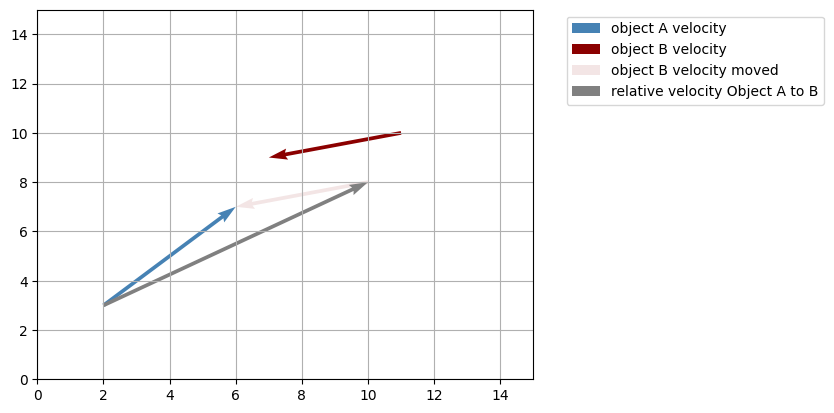

In [34]:
# Plot velocity vectors
fig, ax = plt.subplots()
ax.quiver(x1, y1, V1[0], V1[1], angles='xy', scale_units='xy', scale=1, color = 'steelblue', label = 'object A velocity')
ax.quiver(x2, y2, V2[0], V2[1], angles='xy', scale_units='xy', scale=1, color = 'darkred', label = 'object B velocity')
ax.quiver(x1+V_12[0], y1+V_12[1], V2[0], V2[1], angles='xy', scale_units='xy', scale=1, 
          color = 'darkred', alpha = 0.1, label = 'object B velocity moved')
ax.quiver(x1, y1, V_12[0], V_12[1], angles='xy', scale_units='xy', scale=1, 
          color = 'grey', label = 'relative velocity Object A to B')
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)
ax.grid(True)

plt.legend(bbox_to_anchor =(1.6, 1))
plt.show()

After time t, object A's relative location to object B will be V_12 * t. The minimum distance between V_12 * t and object B's location can be calculated by the equation below:

$$
MD = \frac{| \mathbf{\text{V_12}} \times (\mathbf{B}-\mathbf{A}) |}{|\mathbf{\text{V_12}}|}
$$

In [30]:
cross_product = np.linalg.det(np.array([V_12, B - A]))
V_12_abs = np.linalg.norm(V_12)
MD = np.abs(cross_product) / V_12_abs
MD

1.1659976680069957

**2. Use polynomial equation**

In [31]:
# Get distance vector
Dx = (B-A)[0]
Dy = (B-A)[1]

In [33]:
# Get relative velocity vector
Vx12 = (V1-V2)[0]
Vy12 = (V1-V2)[1]

In [36]:
# Use time t as variable, the minimum distance between object A and B can be calculated by parabola vertex equation
MD = math.sqrt(((Vx12**2 + Vy12**2)*(Dx**2 + Dy**2) - (Dx*Vx12 + Dy*Vy12)**2)/(Vx12**2 + Vy12**2))
MD

1.165997668006996

**3. Use scipy package**

In [37]:
from scipy.optimize import minimize

In [38]:
def distance(t):

    A_t = np.array([x1, y1]) + V1 * t
    B_t = np.array([x2, y2]) + V2 * t

    return np.linalg.norm(A_t - B_t)

In [39]:
result = minimize(distance, 0, bounds=[(0, None)])

In [40]:
min_distance = result.fun
min_time = result.x[0]

In [41]:
min_distance, min_time

(1.16599766800705, 1.2022472283994903)